# Tunnelling in a quantum system

One of the most striking results of quantum mechanics is the tunnel effect, namely the possibility for a matter particle to behave like a wave and to pass (at least partially!) through a potential barrier, which could not be classically crossed.

In this exercise, we will see how this is possible and can be simulated in 1D.

## A *very* quick introduction to quantum mechanics

In the quantum world, the state of a particle is no more described simply by a coordinate function $\mathbf{x}(t)$, specifying its position at time $t$, but by a *wave-function* $\psi(\mathbf{x}, t)$, which tells what is the **amplitude** of the particle at time $t$ in the position $\mathbf{x}$.

The quantity $\psi(\mathbf{x}, t)$ is actually a *complex* function, having both a real and an imaginary part: if one wants to know where the particle is, one can compute the square modulus of $\psi$ which tells what is the **probability** $P(\mathbf{x}, t)$ 

\begin{equation}
P(\mathbf{x}, t) = \left|\psi(\mathbf{x}, t)\right|^2
\end{equation}

of finding the particle in a specific position at a specific time $t$.

Since the particle must be somewhere, for $P$ to be a true probability it is necessary that its integral over the whole space is $1$: for instance, in 1D one should have

\begin{equation}
\int_{-\infty}^{+\infty} P(x, t) d x = 1
\end{equation}

Suppose that we know the function $\psi$ at a certain time $t$, and we assume it represents a particle of mass $M$. How do we compute its evolution in time? For instance, under the action of a certain potential energy $V(\mathbf{x})$ ? By means of the Schrödinger equation

\begin{equation}
i\hbar\frac{\partial \psi}{\partial t}=-\frac{\hbar^2}{2 M}\nabla^2 \psi + V(\mathbf{x}) \psi
\end{equation}

which is a partial differential equation, of the first order in time and of the second order in space. Note that $i$ is the imaginary unit, $i=\sqrt{-1}$.

The operator $\nabla^2$ is simply a second order derivative, for instance in 2 dimensions

\begin{equation}
\nabla^2 \psi = \frac{\partial^2 \psi}{\partial x^2} + \frac{\partial^2 \psi}{\partial y^2}\ .
\end{equation}

The quantity $\hbar = \frac{h}{2\pi} \simeq 1.054\times 10^{-34} J\cdot s$ is the reduced Planck constant (reduced because of the division by $2\pi$)  
We have seen similar equations already, for instance the diffusion equation: but the difference here is that $\psi$ is complex, and because of the $i$ term in the time derivative, we have a different behaviour of the solution.

## Exact solution for $V=0$

Suppose that a particle of mass $M$ moves in one dimension, say from left to right, in a region where the potential $V(\mathbf{x}) = 0$. Then the Schrödinger equation simplifies into

\begin{equation}
i\hbar\frac{\partial \psi}{\partial t}=-\frac{\hbar^2}{2 M}\frac{\partial^2 \psi}{d x^2}
\end{equation}

and it is possible to show that a solution (among infinitely many possible ones) is of the form

\begin{equation}
\psi(x, t)=\sqrt{\frac{\sigma_0}{\sqrt{2\pi}}}\left[\frac{\exp \left(-\frac{\left(x-\frac{p_0 t}{M}\right)^2}{4 \left(\sigma_0^2+\frac{i t \hbar }{2 M}\right)}\right)}{\sqrt{\left(\sigma_0^2+\frac{i t \hbar }{2 M}\right)}}\right]\exp\left(\frac{i \left(p_0 x-\frac{p_0^2 t}{2 M}\right)}{\hbar}\right)
\end{equation}

The factor in square parantheses represents a gaussian wave-packet, whose maximum moves with time, towards larger $x$ values, with a "group velocity" $v_g=\frac{p_0}{M}$, and whose (complex) width

\begin{equation}
\sigma^2(t) = \sigma_0^2 + \frac{i t\hbar}{2 M}
\end{equation}

grows with time. Note that $\sigma_0$ has the dimensions of a length; it represents the dispersion in the initial position of the particle.

The other exponential factor represents a plane wave which oscillates with a phase velocity which is half the group velocity. 

The probability for a particle to be at position $x$ is given as we said by

\begin{equation}
P(x,t)=\left|\psi(x,t)\right|^2=\frac{\sigma_0}{\sqrt{2\pi}}\frac{\exp \left(-\frac{\sigma_0^2
   (x -\frac{p_0 t}{M})^2}{2 \left(\sigma_0^4 +\frac{t^2 \hbar^2}{4 M^2}\right)}\right)}{\sqrt{\sigma_0^4+\frac{t^2 \hbar^2}{4 M^2}}}
\end{equation}

which shows that the maximum of the probability moves with the group velocity, and the width of the probability distribution grows with time as expected.

This exact solution (for $V=0$) will come handy later. Let's now see how to simulate in general.

## Simulating in time

We will try to simulate the evolution of the waveform using a simple forward difference in time, and a central scheme in space: in other words, we will introduce the following two approximations

\begin{eqnarray}
\frac{\partial\psi(x,t)}{\partial t} &\simeq& \frac{\psi(x,t+\Delta t) - \psi(x,t)}{\Delta t}\\
\frac{\partial^2\psi(x,t)}{\partial x^2} &\simeq& \frac{\psi(x+\Delta x,t) - 2 \psi(x,t) + \psi(x-\Delta x, t)}{\left(\Delta x\right)^2}
\end{eqnarray}

the only additional difficulty, with respect to the diffusion equation case, is that we have now to deal with complex numbers.

You have two options here: either you just work with complex numbers, or you write two separate, coupled equations for the real and imaginary parts

\begin{equation}
\psi(x,t) = \psi_R(x,t) + i \psi_I(x,t)
\end{equation}

hence

\begin{eqnarray}
\hbar \frac{\partial\psi_R(x,t)}{\partial t} &=& -\frac{\hbar^2}{2 M}\frac{\partial^2\psi_I(x,t)}{\partial x^2} + V(x)\psi_I(x,t)\\
\hbar \frac{\partial\psi_I(x,t)}{\partial t} &=& +\frac{\hbar^2}{2 M}\frac{\partial^2\psi_R(x,t)}{\partial x^2} - V(x)\psi_R(x,t)\ .
\end{eqnarray}

Either way (using $\psi$ complex, or using $\psi_R$ and $\psi_I$), it is now possible to set up a simulation code.

## Assignment 0: write down code

Write down a *structured* code (or a class) for simulating the time evolution of the waveform over time. The code should be written according to the following general specifications:
* the state of the waveform should be represented by the values of the complex amplitude $\psi$ defined using a complex `numpy` array. The size of the array should be a parameter for any function using the array. If using a class, clearly $\Delta x$ could be a useful class element.
* A method should allow setting the initial values in the array by means of a defined function, and the $\Delta x$ value chosen for the discretization.
* A method should allow evolving by one step the values of $\psi$, taking as parameters the time step $\Delta t$, the discretization step $\Delta x$, the mass $M$ and a function $V(x)$ representing the potential.
* A method should allow computing the probability distribution $P(x,t)$.
* A method should allow plotting the probability distribution, and the real and imaginary parts of $\psi$.
* A method should allow integrating $P(x,t)$ over $d x$, for instance to check the normalization. 

Use zero boundary conditions: that is $\psi=0$ at the boundary.

## Assignment 1: check the code

Since we have an analytical solution for the case $V=0$, let us exploit it to check that what we have written is correct.
We will assume that at $t=0$ the waveform has the shape

\begin{equation}
\psi(x, t)=\left[\frac{\exp \left(-\frac{(x-x_0)^2}{4 \sigma_0^2}\right)}{\sqrt{2\pi\sigma_0}}\right]\exp\left(\frac{i\,p_0 \left(x-x_0\right)}{\hbar}\right)
\end{equation}

where $x_0=10^{-1} m$ and $M=10^{-30} kg$ (about the electron mass). Further, we assume that the particle has a speed $v_g= 10^{-1} m\,s^{-1}$, which corresponds to $p_0 = v_g\cdot M = 10^{-31} kg\, m\, s^{-1}$.

We choose for the initial dispersion the value $\sigma_0 \simeq 2\times 10^{-2} m$ and we let the waveform evolve for $T=8 s$. Recalling the formula for $\sigma^2(t)$

\begin{equation}
\sigma^2(t) = \sigma_0^2 + \frac{i t \hbar}{M} = 4\times 10^{-4} m^2 + i\,t\,10^{-4} m^2 s^{-1}
\end{equation}

one can see that the width will roughly grow by $\sqrt{3}$.

The central position will move by about $L=T\, v_g\simeq 8\times 10^{-1} m$: hence we need an array covering sufficient space, say from $x=0$ to $x=1 m$  with a spacing (say) $\Delta x\sim 10^{-4} m$.

In simulating, beware of the CFL condition, which sets a requirement on the time step $\Delta t$ to ensure numerical stability.

Once obtained the evolved waveform:
* compare, in norm $L_2$, the solution found with the exact solution that we have obtained in the previous formulas.
* Repeat the comparison for different $\Delta t$ values and check the convergence.

The method we have adopted is naive, so it might be affected by numerical instabilities. A more sophisticated and stable method is referenced at the end.

## Assignment 2: use the code for $V\neq 0$

Now that we are confident that our code is not wrong, we carry out the same simulation as before, but this time introducing a non-zero potential, which has the following shape

\begin{eqnarray}
V(x) = 0\quad &\textrm{for}& x \in [0.0, 5.0\times 10^{-1} m)\\
V(x) = V_0\quad &\textrm{for}& x \in [5.0\times 10^{-1} m, 5.5\times 10^{-1} m]\\
V(x) = 0\quad &\textrm{for}& x \in (5.5\times 10^{-1} m, 1 m]
\end{eqnarray}

To choose the value of $V_0$, let us point out that the kinetic energy of our particle, which is coming from the left side, is

\begin{equation}
E_0\sim \frac{p_0^2}{2 M} \simeq 5\times 10^{-33} J 
\end{equation}

Now we want to see what happens for different values of $V_0$, say for
1. $V_0 = - 2\,E_0$
2. $V_0 = - E_0$
3. $V_0 = - \frac{1}{2} E_0$
4. $V_0 = + E_0$
5. $V_0 = + \frac{1}{2} E_0$
6. $V_0 = + 2\,E_0$

For each of these values of $V_0$, the student is asked to simulate the evolution of the wave, and compare the final results.

The method we have adopted is a bit naive, and it might end up being numerically unstable: hence do not be surprised if you have trouble reproducing exactly the results displayed in the following video.

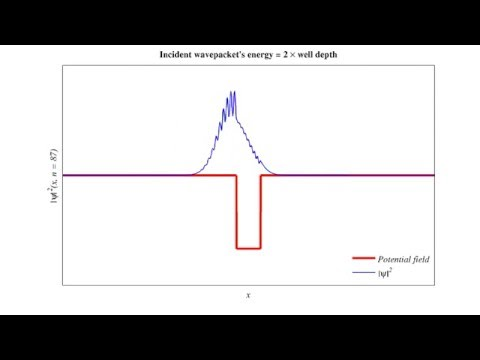

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('cV2fkDscwvY')

## References

Goldberg, Schey and Schwartz, *Computer Generated Motion Pictures of One-Dimensional Quantum-Mechanical Transmission and Reflection Phenomena*, American Journal of Physics **35** (1967) 177-186
http://ergodic.ugr.es/cphys/lecciones/SCHROEDINGER/ajp.pdf